# Assumptions of Linear Regression

Previously, we learned to apply linear regression on a given dataset. But it is important to note that Linear Regression have some assumptions related to the data on which it is applied and if they are not followed, it can affect its performance. These assumptions are:

1. There should be a linear relationship between the dependant and the independant features.
2. There should be no auto-correlation. This means that the error terms should not be correlated.
3. The variance of error terms should be equal.
4. There should be no multi-collinearity. This means that no 2 independant features should be highly correlated.
5. The errors should be normally distributed.

Lets check these assumptions on the model which we have trained in the previous activity.

## Loading the previous model

In [2]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#loading the data
data = pd.read_csv('data/data_cleaned.csv')

#seperating dependant and independant features
X = data.drop('price', axis= 1)
y = data.price

#splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, shuffle= True)

#instantiate a model
model = LinearRegression()

#fit the model to training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now, we have the model. Lets calculate the residuals first.

## Calculate residuals

In [6]:
#create a dataframe to store residuals
result = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})1
result.reset_index(drop= True, inplace= True) #reset indexes
result['residuals'] = result.Actual - result.Predicted # calulating residuals
result.head() #final dataframe

## Check the variance and correlation of error terms

In [12]:
import matplotlib.pyplot as plt #importing libraries for plotting graphs

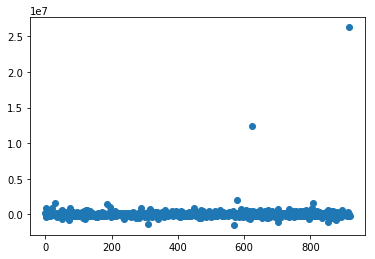

In [14]:
#plotting the residuals
plt.scatter(range(len(y_test)), result.residuals)
plt.show()

We can clearly see that apart from 3-4 points, the spread of error terms is constant. Hence we can conclude that the variance is constant.
Also, there is no specific pattern in the error terms. They are randomly distributed. So, there is no correlation among them.

## Check Distribution of Residuals

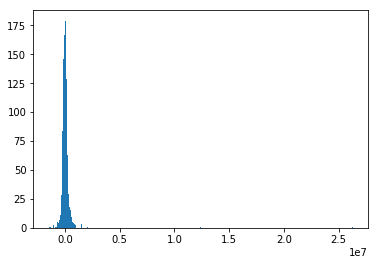

In [19]:
plt.hist(result.residuals, bins= 300)
plt.show()

From the above graph it can be concluded that the error terms are normally distributed. The unusually high peak to the curve is caused by the outliers that were pointed out in the first activity. To confirm the distribution, we can also plot a qq plot

## Check for Multi-Collinearity

To check for multi-collinearity, we can find **Variance Inflation Factor** of all the columns. If for any feature, its value is above 5, we can conclude that the feature is correlated.

In [24]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

bedrooms       21.875501
bathrooms      24.683248
sqft_living    18.097693
sqft_lot        1.242392
floors          9.967520
condition      11.047969
price           2.438325
dtype: float64

There are 4 features having VIF greater than 5. We can remove the 2 features having the higher values. So, none of the features will be correlated and hence multi-collinearity can be removed.

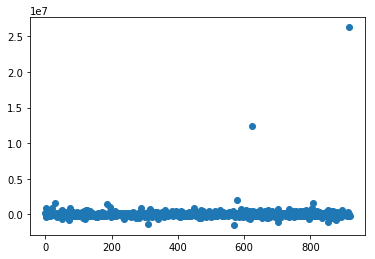

In [25]:
plt.scatter(range(len(y_test)), result.residuals)

## Conclusion

This is how we can check the assumptions of Linear Regression and see if everything follows.

## Additional Resources

1. VIF : https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/